In [1]:
from patsy import *
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

### 부분회귀 플롯

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

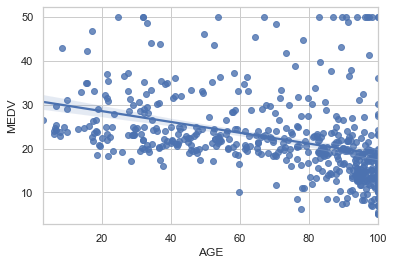

In [3]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

#### statsmodels 패키지의 `sm.graphics.plot_partregress` 명령을 쓰면 부분회귀 플롯을 그릴 수 있다. 이 때 다른 변수의 이름을 모두 지정해 주어야 한다.

- endog: 종속변수 문자열
- exog_i: 분석 대상이 되는 독립변수 문자열
- exog_others: 나머지 독립변수 문자열의 리스트
- data: 모든 데이터가 있는 데이터프레임
- obs_labels: 데이터 라벨링 여부
- ret_coords: 잔차 데이터 반환 여부

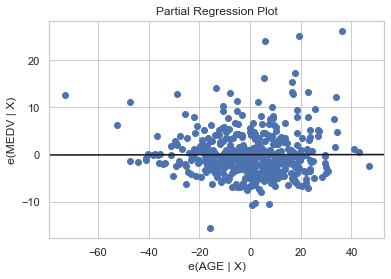

In [4]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

#### `sm.graphics.plot_partregress_grid` 명령을 쓰면 전체 데이터에 대해 한번에 부분회귀 플롯을 그릴 수 있다.

- result: 회귀분석 결과 객체
- fig: plt.figure 객체

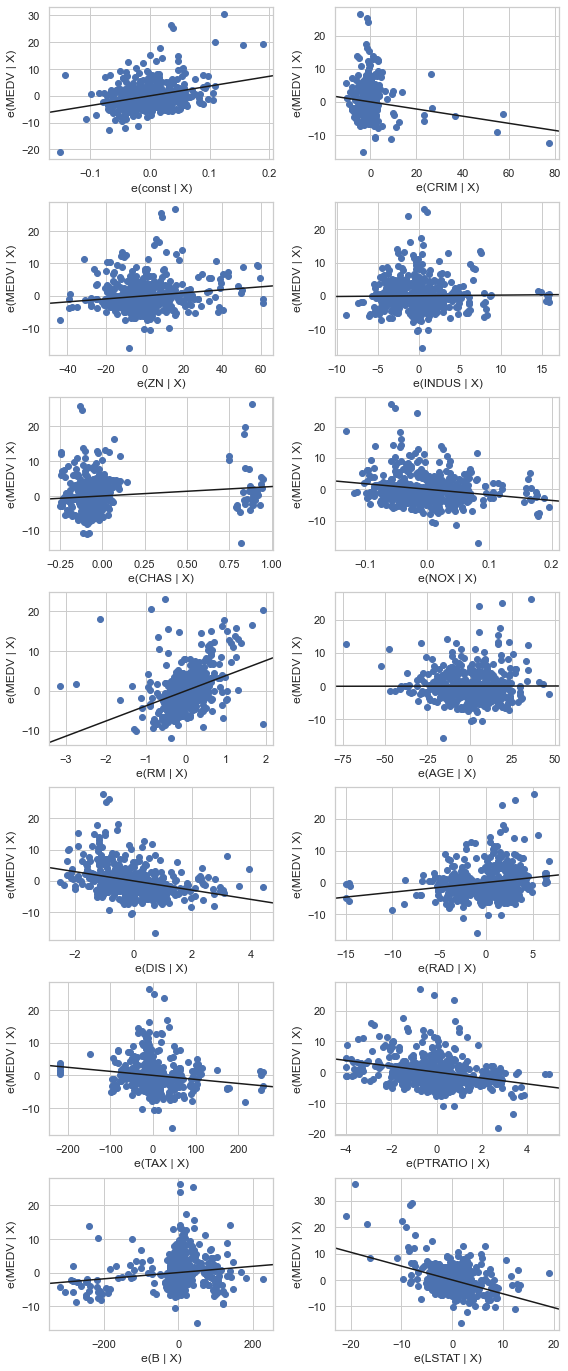

In [5]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

### CCPR플롯
#### 마찬가지로 sm.graphics.plot_ccpr_grid 명령을 쓰면 전체 데이터에 대해 한번에 CCPR 플롯을 그릴 수 있다.

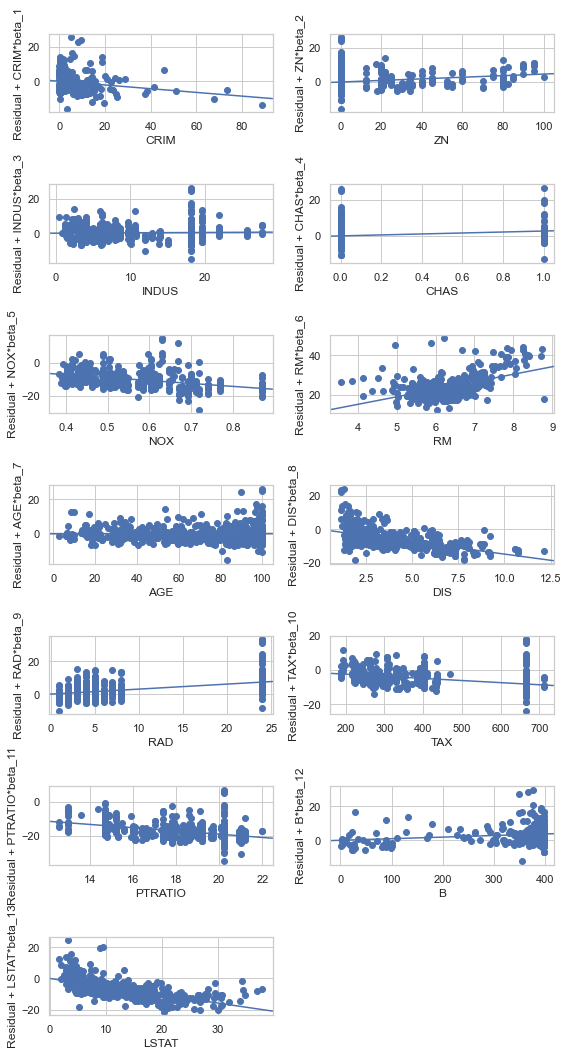

In [6]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

### plot_regress_exog 명령은 부분회귀 플롯과 CCPR을 같이 보여준다.

#### plot_regress_exog(result, exog_idx)
- result: 회귀분석 결과 객체
- exog_idx: 분석 대상이 되는 독립변수 문자열

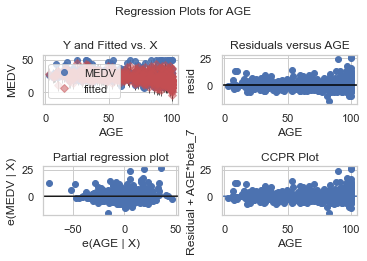

In [7]:
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()